In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
%matplotlib inline

In [3]:
df=pd.read_csv('startup.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,4].values

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
x[:,3]=labelencoder.fit_transform(x[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])
x=onehotencoder.fit_transform(x).toarray()

C:\Users\Hrishikesh D S\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hrishikesh D S\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [6]:
x=x[:,1:]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred=regressor.predict(x_test)

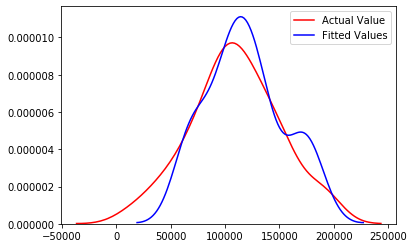

In [10]:
import seaborn as sns

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

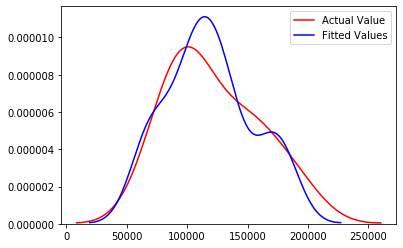

In [11]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [12]:
accuracy = regressor.score(x_test,y_test)
print(accuracy*100,'%')

93.47068473282447 %
